<h1>Trabalhando com dados com alta dimensionalidade</h1>



---





# <font color='green'>Por que trabalhar com alta dimensionalidade?</font>
---


<p>Quando temos dados com alta dimensionalidade, uma das coisas que precisamos fazer é reduzir o número de dimensões, isto é, diminuir a dimensionalidade do dado. Mas por que?</p>

<p>Para os algoritmos de Machine Learning, quanto maior o número de dimensões, nos temos os seguintes resultados:</p>
<ul>
    <li>Mais lento é o processo;</li>
    <li>Mais espaço de armazenamento;</li>
    <li>Pode superajustar os nossos modelos aos dados do treinamento.</li>
<ul> 

# Inicio

<font color='green'><h2>Importando o Dataset e bibliotecas necessárias

---



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
url = 'https://github.com/alura-cursos/reducao-dimensionalidade/raw/master/data-set/exames.csv'
dados = pd.read_csv(url)

In [ ]:
dados.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


<font color='green'><h2>Verificando valores nulos no Dataframa


---



In [ ]:
selecao_nulos = pd.DataFrame(dados.isnull().sum(), columns = ['Resultado'])
selecao_nulos.query('Resultado > 0')

,Resultado
exame_33,419


In [ ]:
total_registros = dados.shape[0]
porcetagem_faltosa = (419/total_registros) * 100
print(f'Na coluna "exame_33" há {porcetagem_faltosa:.2f}% dados faltosos')

Na coluna "exame_33" há 73.64% dados faltosos


**<h3> ---> Por a coluna "exame_33" ter um alta porcetagem de valores faltosos, ela será eliminada do nosso dataframe.**

In [ ]:
dados.drop(columns=['exame_33'], inplace = True)

In [ ]:
dados.head(1)

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,842302,M,17.99,10.38,122.8,103.78,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.1189


<font color='green'><h2>Separando minha classe (Y) das minhas Features (X)


---



In [ ]:
x = dados.drop(columns=['id', 'diagnostico'])
y = dados['diagnostico']

<font color='green'><h2>Criando lista de resultados e index de registros de resultados


---



In [ ]:
registros = []
index = []

<font color='green'><h2>Realizando segregação do treino e teste,  validando o modelo e acuracia.


---



In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

SEED = 150993
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.3, stratify = y)

modelo = RandomForestClassifier(n_estimators=100)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes)*100
print(f'A acuracia do modelo é {acuracia:.2f}%')
registros.append(acuracia)
index.append('ac_initial')

A acuracia do modelo é 95.91%


In [ ]:
from sklearn.dummy import DummyClassifier

SEED = 150993
np.random.seed(SEED)

dummy = DummyClassifier()
dummy.fit(treino_x, treino_y)
acuracia_dum = dummy.score(teste_x, teste_y)*100
print(f'A Baseline do modelo é {acuracia_dum:.2f}%')
registros.append(acuracia_dum)
index.append('ac_base_line')

A Baseline do modelo é 47.37%


/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


**<h2>Conclusão:** Com esta análise inicial podemos ver que realmente nosso modelo construido é um bom modelo, estando bem acima da Baseline estipulada. Porém continuaremos nossa análise para remover as múltiplas dimensionalidades de nossa análise.

#Visualização dos valores

<font color='green'><h2>Criando dataset tratado para visualização


---



In [ ]:
dados_plot = pd.concat([y, x], axis = 'columns')
dados_plot.head(2)

,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,M,17.99,10.38,122.8,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902


In [ ]:
dados_plot = pd.melt(dados_plot, id_vars="diagnostico", 
                 var_name="exames",
                 value_name="valores")
dados_plot.head()

,diagnostico,exames,valores
0,M,exame_1,17.99
1,M,exame_1,20.57
2,M,exame_1,19.69
3,M,exame_1,11.42
4,M,exame_1,20.29


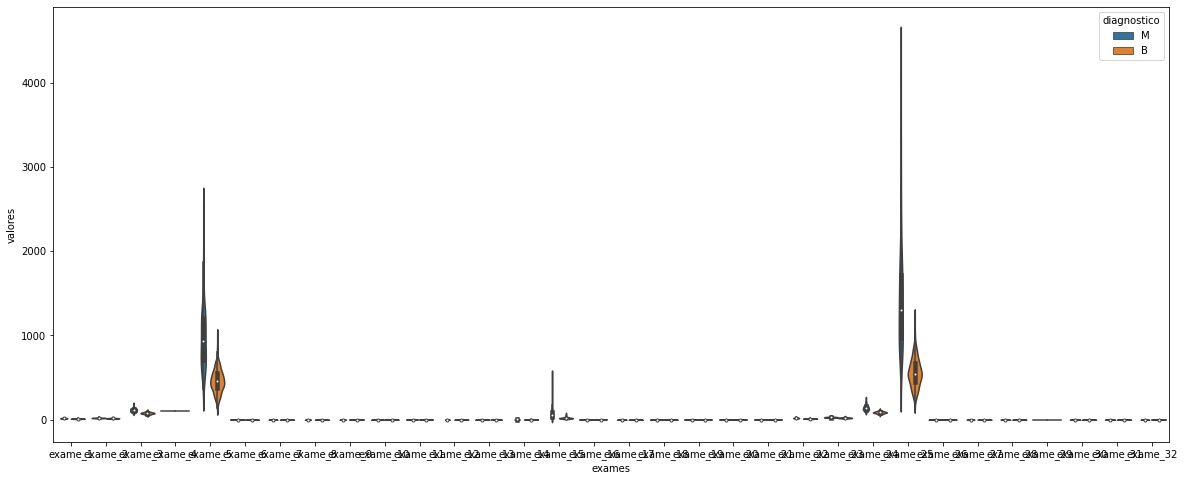

In [ ]:
plt.figure(figsize=(20,8))
sns.violinplot(data = dados_plot, x = 'exames', y = 'valores', hue = 'diagnostico')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text major ticklabel objects>)

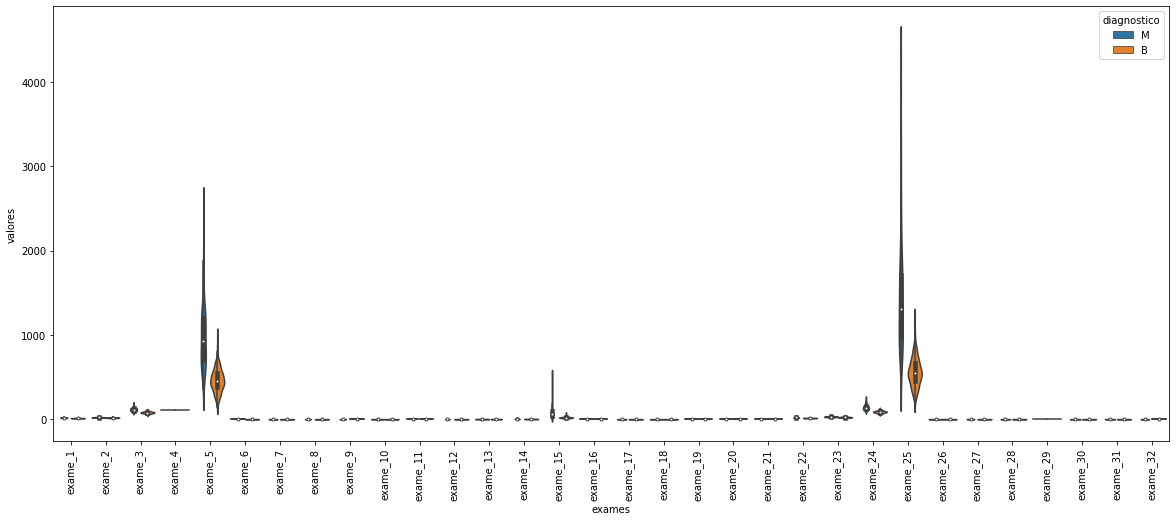

In [ ]:
plt.figure(figsize=(20,8))
sns.violinplot(data = dados_plot, x = 'exames', y = 'valores', hue = 'diagnostico')
plt.xticks(rotation = 90)

<h1>

<font color='green'><h2>Seperando valores de 10 em 10


---



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

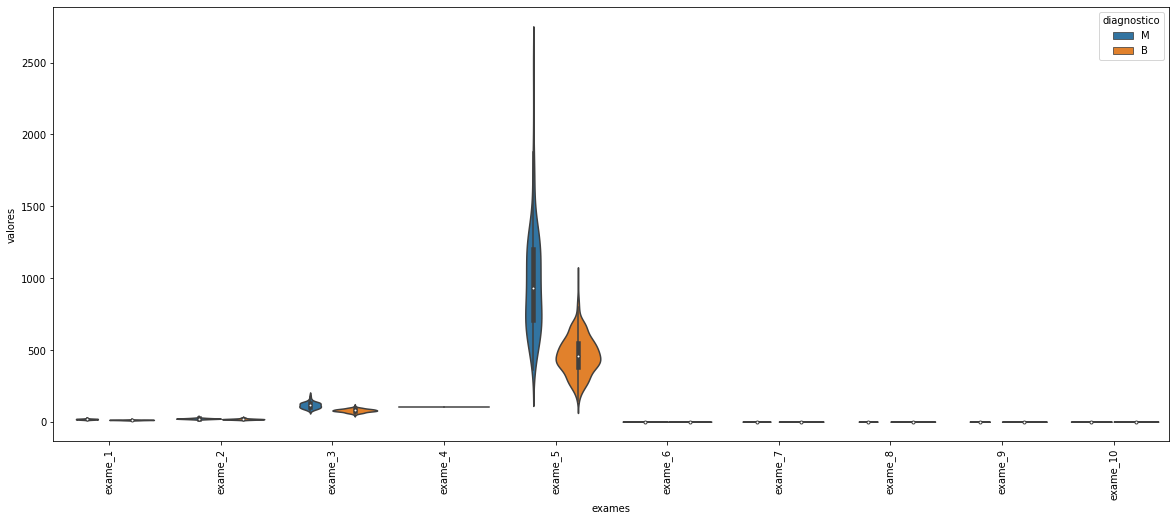

In [ ]:
dados_plot = pd.concat([y, x.iloc[:,:10]], axis = 'columns')
dados_plot = pd.melt(dados_plot, id_vars="diagnostico", 
                 var_name="exames",
                 value_name="valores")
plt.figure(figsize=(20,8))
sns.violinplot(data = dados_plot, x = 'exames', y = 'valores', hue = 'diagnostico')
plt.xticks(rotation = 90)

<font color='green'><h2>Padronização do eixo Y


---



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x_v1 = scaler.transform(x)
x_v1

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [ ]:
x_v1 = pd.DataFrame(x_v1, columns=x.keys())
x_v1.head(1)

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,1.097064,-2.073335,1.269934,1.0,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.66082,1.148757,0.907083,1.88669,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,1.0,2.296076,2.750622,1.937015


<font color='green'><h2>Visualização dos exames


---



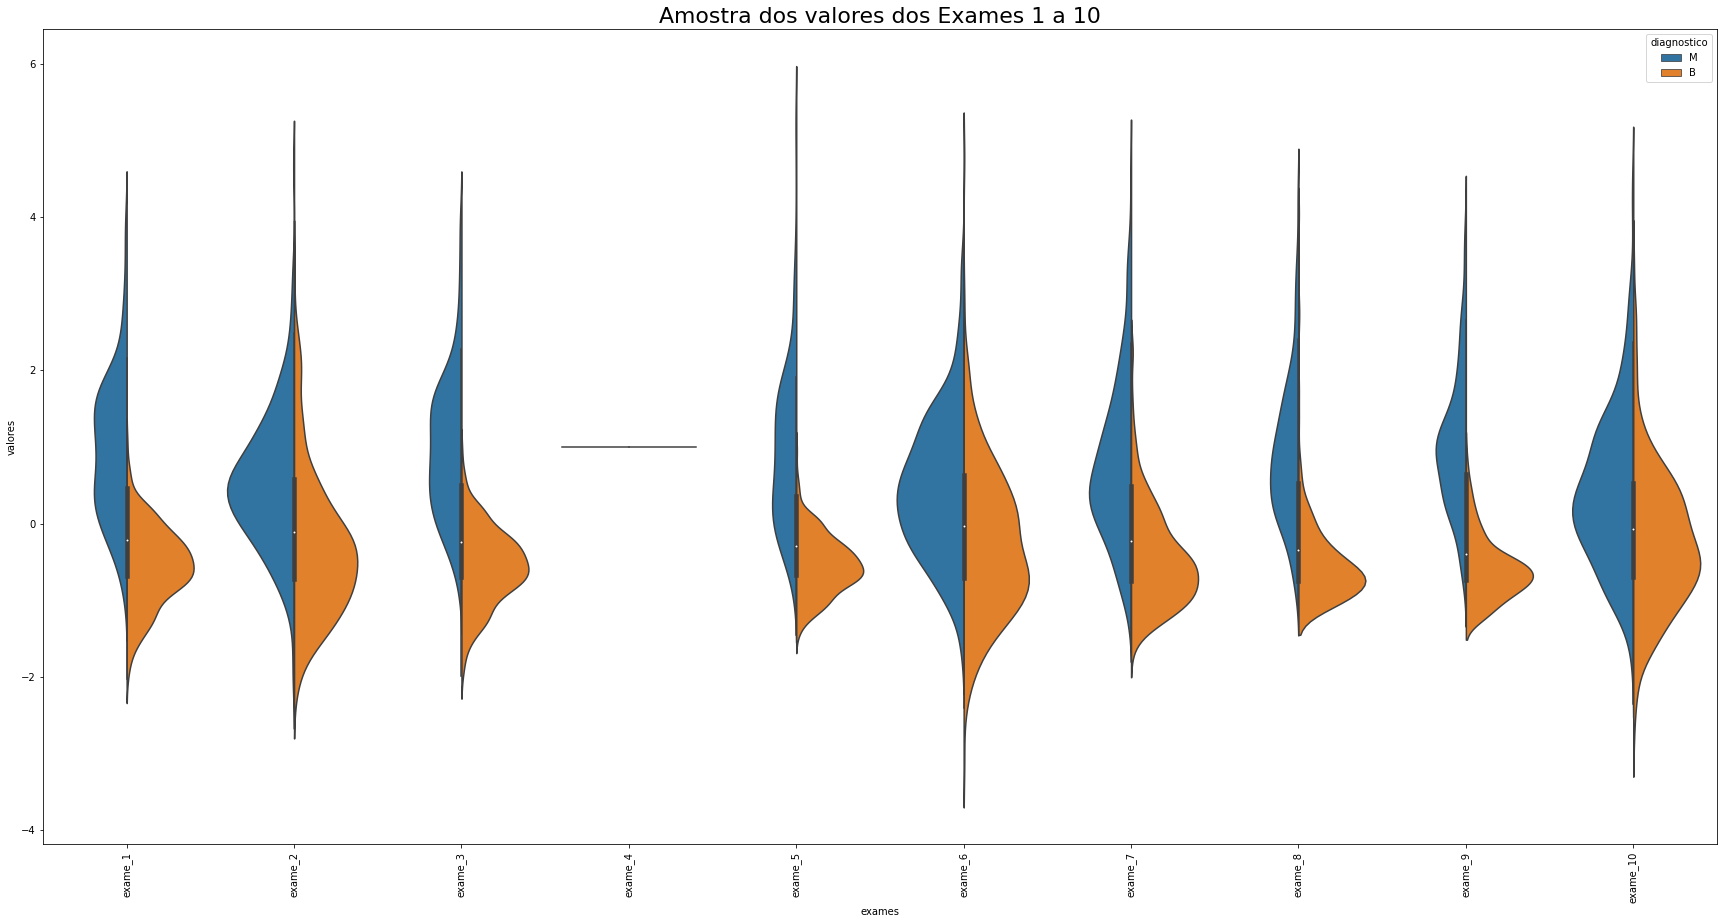

In [ ]:
def plotando_violinos(features, inicio, fim):
    dados_plot = pd.concat([y, features.iloc[:,inicio:fim]], axis = 'columns')
    dados_plot = pd.melt(dados_plot, id_vars="diagnostico", 
                    var_name="exames",
                    value_name="valores")
    plt.figure(figsize=(30,15))
    sns.violinplot(data = dados_plot, x = 'exames', y = 'valores', hue = 'diagnostico', split = True)
    plt.xticks(rotation = 90)
    plt.title(f'Amostra dos valores dos Exames {inicio+1} a {fim}', fontsize=22)

plotando_violinos(x_v1, 0, 10)

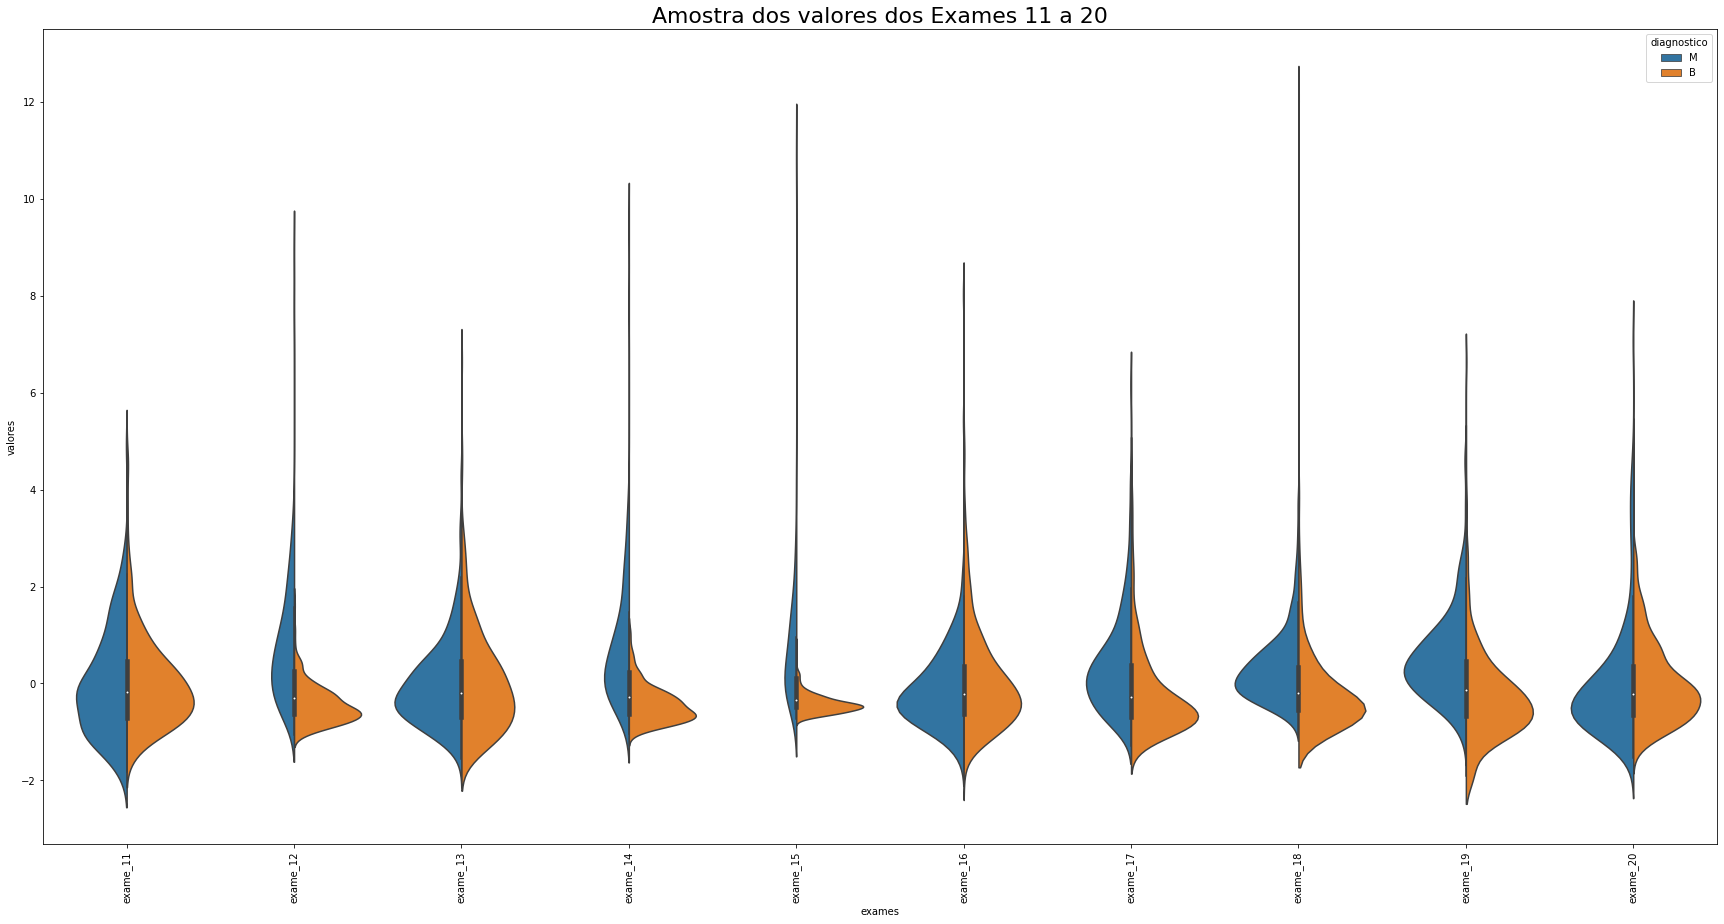

In [ ]:
plotando_violinos(x_v1, 10, 20)

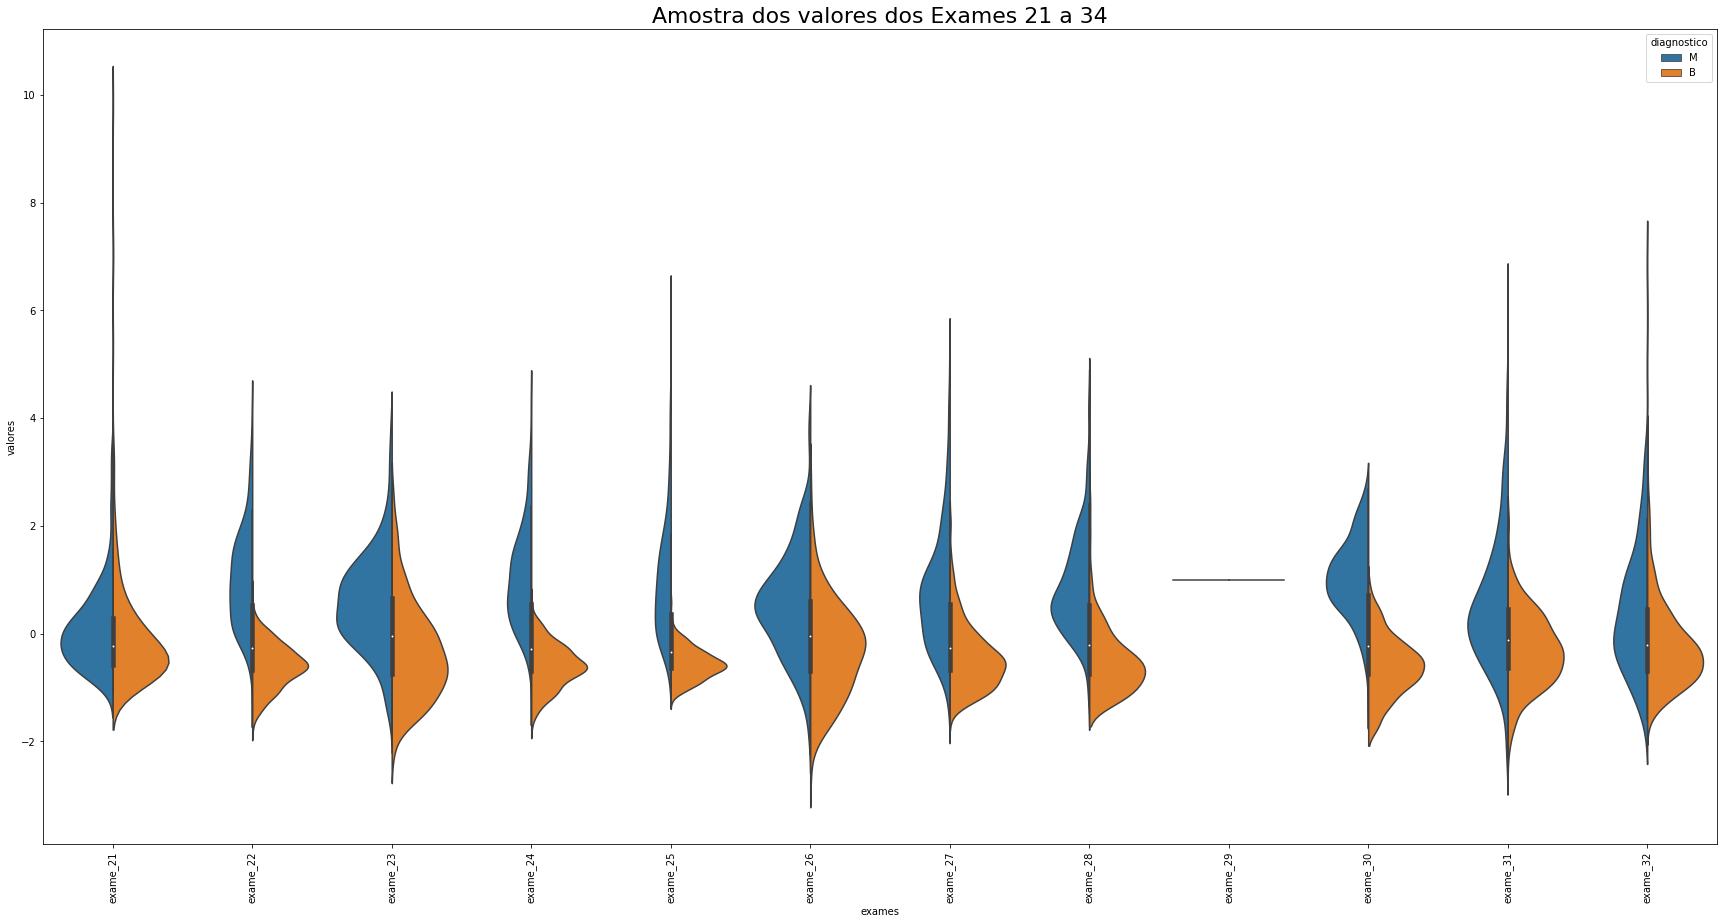

In [ ]:
plotando_violinos(x_v1, 20, dados.shape[1])

<font color='green'><h2>Realizando o treino e teste sem os valores constantes identificados: (exame_29 e exame_4)


---



In [ ]:
dados_plot.head(1)

,diagnostico,exames,valores
0,M,exame_1,17.99


In [ ]:
dados = pd.concat([y, x_v1], axis = 'columns')
dados.drop(columns=['exame_4', 'exame_29'], inplace=True)
dados.head(1)

,diagnostico,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,M,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.66082,1.148757,0.907083,1.88669,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015


In [ ]:
def treino_teste(dados_tratados, nome_de_registro):
    SEED = 150993
    np.random.seed(SEED)

    x = dados_tratados.drop(columns=['diagnostico'])
    y = dados_tratados['diagnostico']

    treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.3, stratify = y)

    modelo = RandomForestClassifier(n_estimators=100)
    modelo.fit(treino_x, treino_y)
    previsoes = modelo.predict(teste_x)
    acuracia = accuracy_score(teste_y, previsoes)*100
    registros.append(acuracia)
    index.append(nome_de_registro)
    print(f'A acuracia do modelo é {acuracia:.2f}%')
    

treino_teste(dados, 'ac_no_const_value')

A acuracia do modelo é 96.49%


In [ ]:
pd.DataFrame(registros, index=index, columns=['resultado_acuracia_modelos'])

,resultado_acuracia_modelos
ac_initial,95.906433
ac_base_line,47.368421
ac_no_const_value,96.491228



<font color='green'><h2>Realizando teste de correlação das variavéis

---



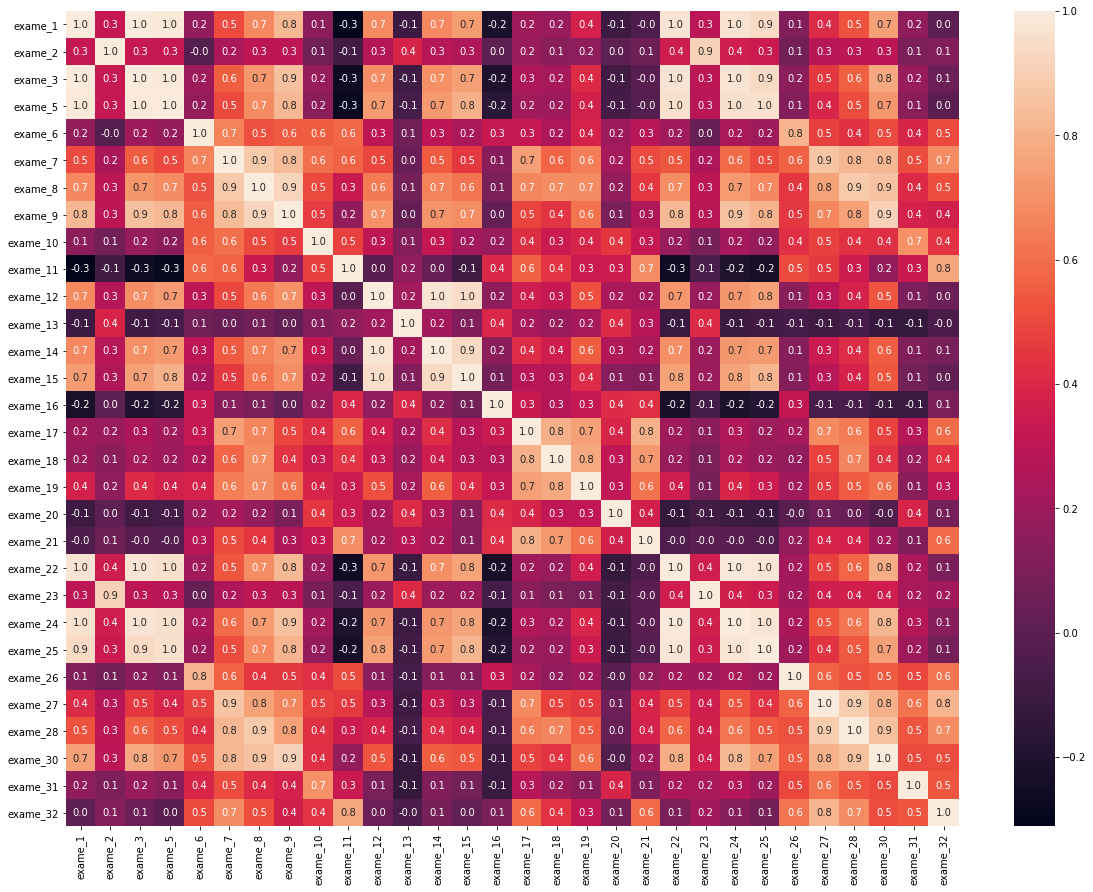

In [ ]:
matriz_correlacao = dados.corr()
plt.figure(figsize=(20,15))
sns.heatmap(matriz_correlacao, annot=True, fmt = ".1f")

**<h3>Identificando as correlações quase perfeitas**

In [ ]:
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao > 0.99]
matriz_correlacao_v1

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
matriz_correlacao_v2 = matriz_correlacao_v1.sum()
matriz_correlacao_v2

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

**<h3>Verificação das variaveis altamente relacionadas**

In [ ]:
variaveis_correlacao = matriz_correlacao_v2[matriz_correlacao_v2 > 1]
variaveis_correlacao

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

**<h3>Remoção das variaveis altamente realcionadas**

In [ ]:
# x_v2 = x_v1.drop(columns=['exame_3', 'exame_24'])
x_v2 = x.copy()
x_v2.drop(columns=['exame_3', 'exame_24', 'exame_4', 'exame_29'], inplace=True)
dados = pd.concat([y, x_v2], axis = 'columns')
dados.head(1)


,diagnostico,exame_1,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,M,17.99,10.38,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


In [ ]:
treino_teste(dados, 'ac_no_corr_high')

A acuracia do modelo é 96.49%


In [ ]:
pd.DataFrame(registros, index=index, columns=['resultado_acuracia_modelos'])

,resultado_acuracia_modelos
ac_initial,95.906433
ac_base_line,47.368421
ac_no_const_value,96.491228
ac_no_corr_high,96.491228


---

# Selecionando as melhores features




## Utilizando KBEST

---





<h3>Neste modelo ele fará a classificação através de uma função (Chi2) e pegará as 'N' melhores features para a predição.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 # função que da um score das melhores features
from sklearn.model_selection import train_test_split
import numpy as np

SEED = 150993
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x_v2, y, test_size = 0.3)

kmelhores_features = SelectKBest(chi2, k = 10)
kmelhores_features.fit(treino_x, treino_y)
treinox_kbest = kmelhores_features.transform(treino_x)
testex_kbest = kmelhores_features.transform(teste_x)


In [ ]:
treinox_kbest.shape

(398, 10)

In [ ]:
testex_kbest.shape

(171, 10)

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

SEED = 150993
np.random.seed(SEED)

modelo = RandomForestClassifier(n_estimators=100)
modelo.fit(treinox_kbest, treino_y)
previsoes = modelo.predict(testex_kbest)
acuracia_kbest = accuracy_score(teste_y, previsoes)*100
registros.append(acuracia_kbest)
index.append('ac_10_features_kbest')
print(f'A acuracia do modelo é {acuracia_kbest:.2f}%')

A acuracia do modelo é 94.15%


In [ ]:
pd.DataFrame(registros, index=index, columns=['resultado_acuracia_modelos'])

,resultado_acuracia_modelos
ac_initial,95.906433
ac_base_line,47.368421
ac_no_const_value,96.491228
ac_no_corr_high,96.491228
ac_10_features_kbest,94.152047


In [ ]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(teste_y, previsoes)

Text(56.5, 0.5, 'Real')

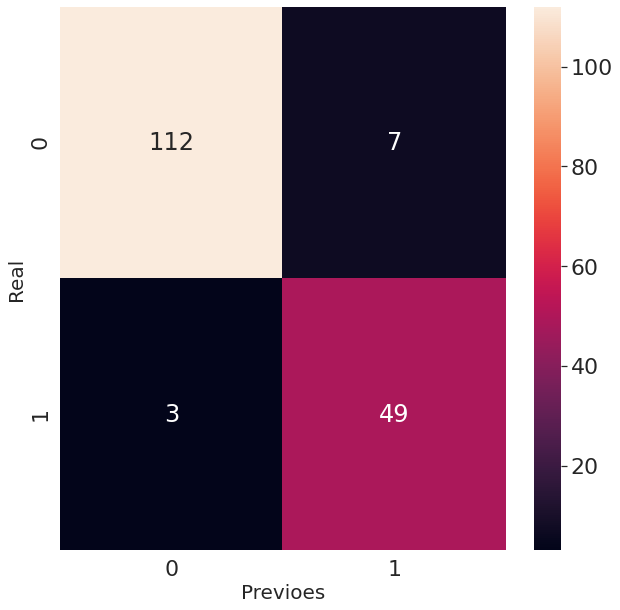

In [ ]:
plt.figure(figsize=(10,10))
sns.set(font_scale=2)
fig = sns.heatmap(matriz_confusao, annot=True, fmt = "d")
fig.set_xlabel("Previoes", fontsize = 20)
fig.set_ylabel("Real", fontsize = 20)



---



## Utilizando o Recursive Feature Elimination (RFE).

---



<h3>Neste modelo ele fará a eliminação das features por etapa:
<ul><li>1a. Etapa -> Seleciona todas as features e da uma pontução, assim a menor pontuação sera eliminiada.
<li>2a. Etapa -> Com a feature anterior eliminada, realiza novamente uma nova pontuação (com somente as features atuais) e novamente elimina a de menor pontuação. 
<li>3a. Etapa -> Estes passos se repetem repetidamente até chegar ao número de features desejaveis. 
</ul>

---



In [ ]:
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

SEED = 150993
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x_v2, y, test_size = 0.3)

modelo = RandomForestClassifier(n_estimators=100)

features_rfe = RFE(estimator= modelo, n_features_to_select= 10, step=1)
features_rfe.fit(treino_x, treino_y)
treino_rfe = features_rfe.transform(treino_x)
teste_rfe = features_rfe.transform(teste_x)

modelo.fit(treino_rfe, treino_y)
previsoes = modelo.predict(teste_rfe)
acuracia_rfe = accuracy_score(teste_y, previsoes) * 100

registros.append(acuracia_rfe)
index.append('ac_10_features_rfe')
print(f'A acuracia do modelo é {acuracia_rfe:.2f}%')

A acuracia do modelo é 91.23%


In [ ]:
pd.DataFrame(registros, index=index, columns=['resultado_acuracia_modelos'])

,resultado_acuracia_modelos
ac_initial,95.906433
ac_base_line,47.368421
ac_no_const_value,96.491228
ac_no_corr_high,96.491228
ac_10_features_kbest,94.152047
ac_10_features_rfe,91.228070


In [ ]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(teste_y, previsoes)

Text(56.5, 0.5, 'Real')

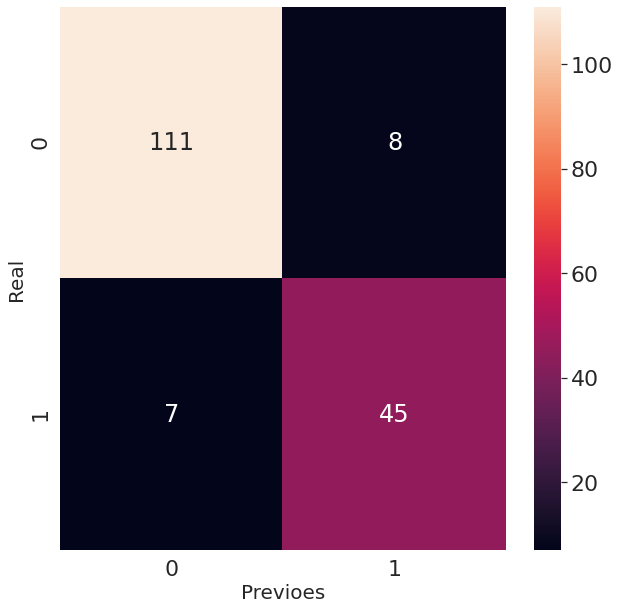

In [ ]:
plt.figure(figsize=(10,10))
sns.set(font_scale=2)
fig = sns.heatmap(matriz_confusao, annot=True, fmt = "d")
fig.set_xlabel("Previoes", fontsize = 20)
fig.set_ylabel("Real", fontsize = 20)



---



## Seleção com RFECV (RFE Cross Validation)

---



In [ ]:
import numpy as np
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

SEED = 150993
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x_v2, y, test_size = 0.3)

modelo = RandomForestClassifier(n_estimators=100)

features_rfecv = RFECV(estimator= modelo, cv= 5, step=1, scoring="accuracy")
features_rfecv.fit(treino_x, treino_y)
treino_rfecv = features_rfecv.transform(treino_x)
teste_rfecv = features_rfecv.transform(teste_x)

modelo.fit(treino_rfecv, treino_y)
previsoes = modelo.predict(teste_rfecv)
acuracia_rfecv = accuracy_score(teste_y, previsoes) * 100

registros.append(acuracia_rfecv)
index.append('ac_features_rfecv')
print(f'A acuracia do modelo é {acuracia_rfecv:.2f}%')

A acuracia do modelo é 93.57%


In [ ]:
pd.DataFrame(registros, index=index, columns=['resultado_acuracia_modelos'])

,resultado_acuracia_modelos
ac_initial,95.906433
ac_base_line,47.368421
ac_no_const_value,96.491228
ac_no_corr_high,96.491228
ac_10_features_kbest,94.152047
ac_10_features_rfe,91.228070
ac_features_rfecv,93.567251


Text(56.5, 0.5, 'Real')

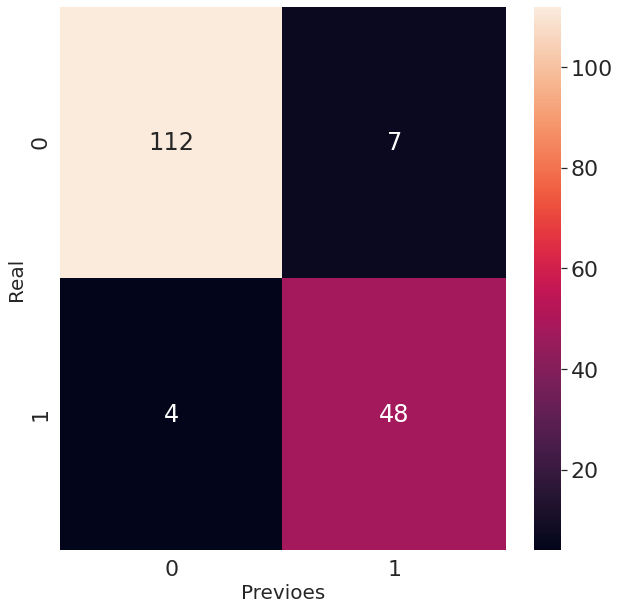

In [ ]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(teste_y, previsoes)

plt.figure(figsize=(10,10))
sns.set(font_scale=2)
fig = sns.heatmap(matriz_confusao, annot=True, fmt = "d")
fig.set_xlabel("Previoes", fontsize = 20)
fig.set_ylabel("Real", fontsize = 20)

In [ ]:
print('numero de features para obter o melhor resultado possivel: ',features_rfecv.n_features_)

numero de features para obter o melhor resultado possivel:  23


In [ ]:
features_rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True, False, False,
        True, False,  True,  True, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
treino_x.columns[features_rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_12', 'exame_14', 'exame_15', 'exame_17', 'exame_18',
       'exame_20', 'exame_21', 'exame_22', 'exame_23', 'exame_25', 'exame_26',
       'exame_27', 'exame_28', 'exame_30', 'exame_31', 'exame_32'],
      dtype='object')

In [ ]:
#Acuracia de cada resultado de total de features por acuracia.
#Posicao 0 = 1 feature selecionada chegou a resultado de 0.87689873 de acuracia
#Posicao 1 = 2 feature selecionadas chegou a resultado de 0.93218354 de acuracia
# ... 
##Posicao 22 = 23 feature selecionadas chegou a resultado de 0.96227848 de acuracia
features_rfecv.grid_scores_

array([0.87689873, 0.93218354, 0.96227848, 0.95727848, 0.95977848,
       0.95974684, 0.96477848, 0.95974684, 0.95474684, 0.95724684,
       0.95974684, 0.95974684, 0.95724684, 0.95974684, 0.96481013,
       0.96231013, 0.96477848, 0.96984177, 0.96227848, 0.95974684,
       0.96227848, 0.96731013, 0.97234177, 0.96227848, 0.96224684,
       0.96227848, 0.95974684, 0.96227848])

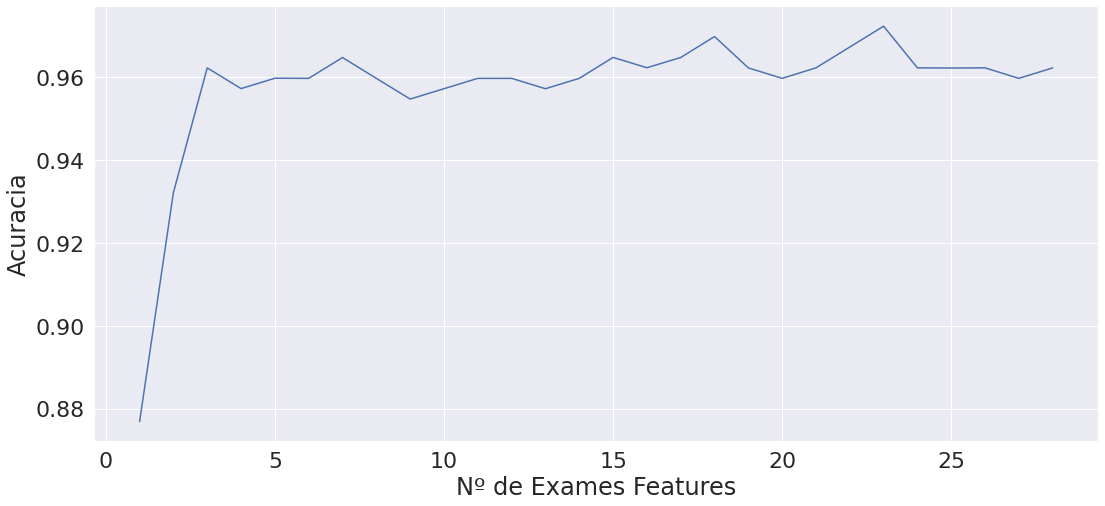

In [ ]:
import matplotlib.pyplot as plt

tamanhoX = len(features_rfecv.grid_scores_) +1

plt.figure(figsize=(18, 8))
plt.xlabel("Nº de Exames Features")
plt.ylabel("Acuracia")
plt.plot(range(1, tamanhoX), features_rfecv.grid_scores_ )

# Visualização em dois planos com multiplas dimensoes

## Utilizando features selection

**No exemplo a seguir não é o recomendável fazer:**

---



In [ ]:
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

SEED = 150993
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x_v2, y, test_size = 0.3)

modelo = RandomForestClassifier(n_estimators=100)

features_rfe = RFE(estimator= modelo, n_features_to_select= 2, step=1)
features_rfe.fit(treino_x, treino_y)
treino_rfe = features_rfe.transform(treino_x)
teste_rfe = features_rfe.transform(teste_x)

modelo.fit(treino_rfe, treino_y)
previsoes = modelo.predict(teste_rfe)
acuracia_rfe = accuracy_score(teste_y, previsoes) * 100

In [ ]:
tipos_exames_rfe = features_rfe.transform(x_v2)
tipos_exames_rfe.shape

(569, 2)

In [ ]:
tipos_exames_rfe

array([[25.38  ,  0.2654],
       [24.99  ,  0.186 ],
       [23.57  ,  0.243 ],
       ...,
       [18.98  ,  0.1418],
       [25.74  ,  0.265 ],
       [ 9.456 ,  0.    ]])

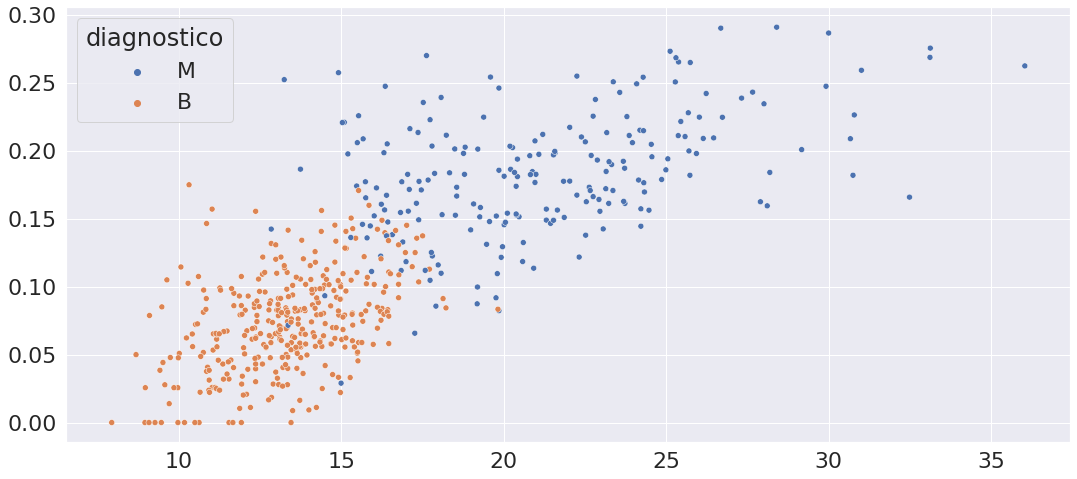

In [ ]:
import seaborn as sns
plt.figure(figsize=(18,8))
sns.scatterplot(x = tipos_exames_rfe[:,0] , y = tipos_exames_rfe[:,1], hue = y)

**Conclusão:** Ao se utilizar as técnicas de seleção de feature para gerar uma visualização no plano, é preciso escolher dois dos atributos para representar os dados. Manter apenas dois dos diversos atributos, faz com que um grande número de informação seja perdida, resultado em visualizações que podem induzir à conclusões equivocadas.

---



## Redução de dimensionalidade

Para gerar uma visualização no plano, o ideal é utilizar técnicas que tentam preservar o maior número possível de informação em uma dimensão reduzida, como PCA e T-SNE.

---



### PCA

O PCA é usado para decompor um conjunto de dados multivariado em um conjunto de componentes ortogonais sucessivos que explicam uma quantidade máxima da variação. No scikit-learn, o PCA é implementado como um objeto transformador que aprende componentes em seu método de ajuste e pode ser usado em novos dados para projetá-los nesses componentes.

O PCA centraliza, mas não dimensiona os dados de entrada para cada recurso antes de aplicar o SVD. O parâmetro opcional whiten = True torna possível projetar os dados no espaço singular enquanto dimensiona cada componente para a variação da unidade. Isso é frequentemente útil se os modelos a jusante fazem suposições fortes sobre a isotropia do sinal: este é, por exemplo, o caso para Support Vector Machines com o kernel RBF e o algoritmo de agrupamento K-Means.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

tipos_exames_pca = pca.fit_transform(x_v2)
tipos_exames_pca

array([[1157.37688421, -293.81017696],
       [1267.4687997 ,   15.91568628],
       [ 994.05000153,   39.07405468],
       ...,
       [ 313.54257115,   47.32093974],
       [1121.40671014,   33.68512999],
       [-769.01504719,  -87.76799118]])

No PCA para uma melhor visualização é necessário você escalar suas features, a seguir temos um exemplo plotado **sem escalar as features**:

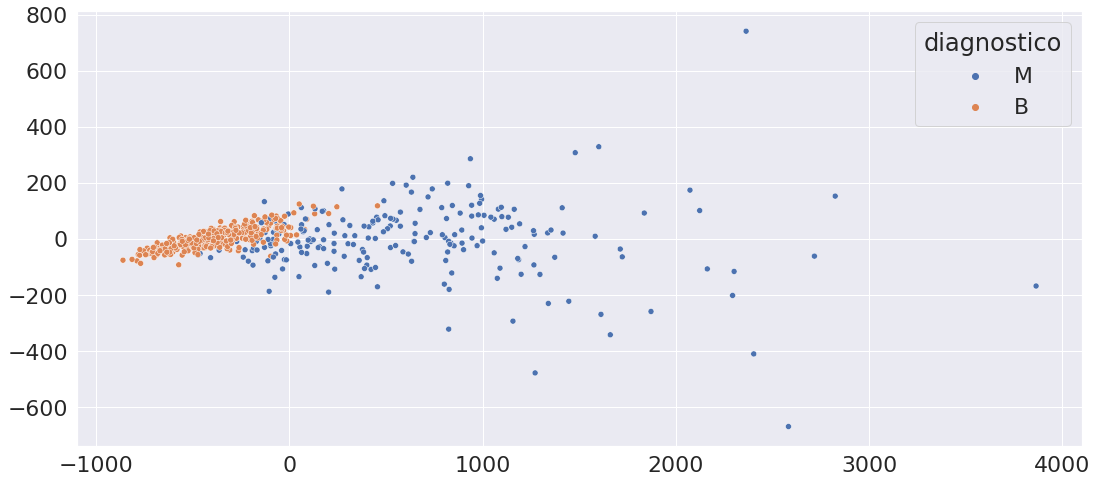

In [ ]:
plt.figure(figsize=(18,8))
sns.scatterplot(x = tipos_exames_pca[:,0] , y = tipos_exames_pca[:,1], hue = y)

**Escalando as features**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_v2_escalado = scaler.fit_transform(x_v2)

In [ ]:
tipos_exames_pca_v2[:,1]

array([ 1.20129074e+00, -3.54148885e+00, -1.46792042e+00,  9.19427703e+00,
       -1.98716747e+00,  3.58994488e+00, -2.57054222e+00,  2.03695072e+00,
        2.91217612e+00,  6.73374897e+00, -2.38643712e+00, -6.99394130e-02,
        1.90444561e+00, -9.41512310e-01,  4.31350185e+00,  2.52501525e+00,
       -1.53106247e+00,  1.04924770e+00, -4.25935720e+00, -3.60695816e-02,
        7.97512359e-01,  1.77535081e+00,  2.83710944e+00, -5.07942395e+00,
       -1.84956676e+00,  1.33706089e+00,  1.81762044e+00, -2.03290005e+00,
        2.34431143e-01, -1.44961208e+00, -1.22861405e+00,  3.59972794e+00,
       -9.33741704e-02, -1.31927399e+00,  6.34678325e-01, -4.85649984e-01,
        8.07574196e-01, -1.04909228e+00, -3.47468173e+00,  7.83537308e-01,
       -1.68197329e+00,  2.01517880e+00,  1.22572166e+00,  8.61967227e-01,
       -1.26842199e-01, -4.72668730e-01,  1.62657755e+00,  2.07538976e+00,
        2.64979922e-01, -1.08273631e+00, -1.05230650e+00, -1.26736021e+00,
       -1.95060157e-01, -

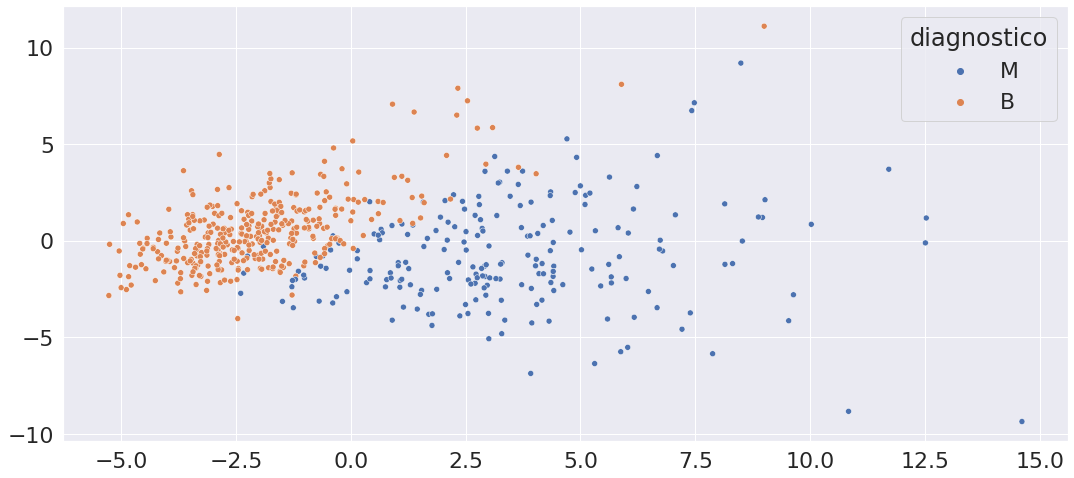

In [ ]:
pca = PCA(n_components=2)

tipos_exames_pca_v2 = pca.fit_transform(x_v2_escalado)
plt.figure(figsize=(18,8))
sns.scatterplot(x = tipos_exames_pca_v2[:,0] , y = tipos_exames_pca_v2[:,1], hue = y)

### TSNE

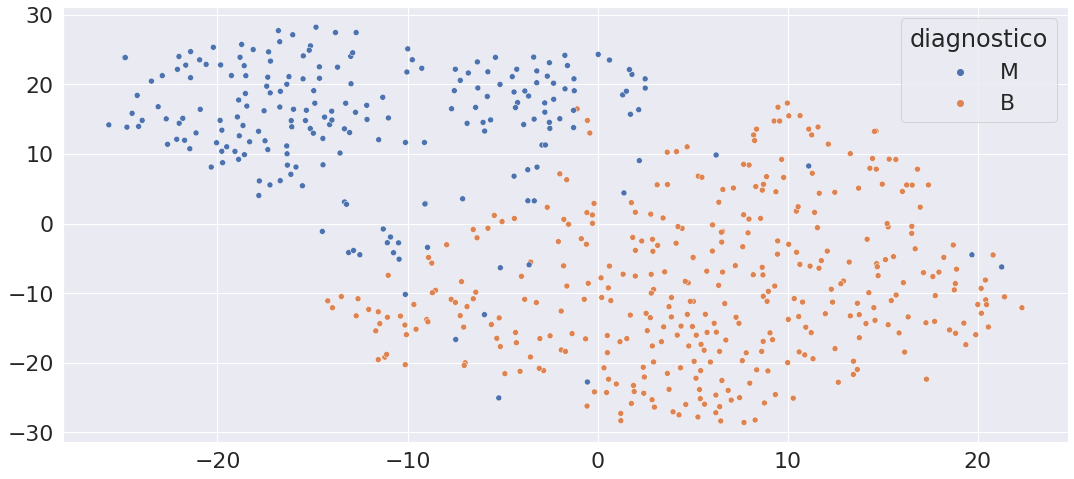

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)

tipos_exames_pca_v3 = tsne.fit_transform(x_v2_escalado)
plt.figure(figsize=(18,8))
sns.scatterplot(x = tipos_exames_pca_v3[:,0] , y = tipos_exames_pca_v3[:,1], hue = y)